# Atividade 9

Obter filtros no domínio da frequência, mantendo porcentagens diferentes de potência do sinal.

### Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from PIL import Image

%matplotlib inline

C:\Users\danil\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\danil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\danil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


### Funções utilizadas

In [2]:
# distance
def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# High-pass filter
def hpFilter(radius, img):
    ImgOut = np.ones(img.shape)
    rows, cols = img.shape
    
    for y in range(rows):
        for x in range(cols):
            if dist((y,x), (rows/2,cols/2)) < radius:
                ImgOut[y,x] = 0
    return ImgOut

# Low-pass filter
def lpFilter(radius, img):
    ImgOut = np.ones(img.shape)
    rows, cols = img.shape
    
    for y in range(rows):
        for x in range(cols):
            if dist((y,x), (rows/2,cols/2)) > radius:
                ImgOut[y,x] = 0
    return ImgOut

# magnitude Furier
def magnitude(X):
    Imag = np.sqrt((X.real**2) + (X.imag**2))
    
    return Imag

# power spectrum
def power(Imag):
    ImgOut = np.power(Imag,2)
    
    return ImgOut

# filter get by percent of signal
def percentSpectrum(Imag, percent, filter_type):
    # 0 -> high-pass, 1 -> low-pass
    Img_pot = Imag
    total = np.sum(Img_pot)
  
    if filter_type == 1:
        radius = np.sqrt((Imag.shape[0]*Imag.shape[1])/np.pi) * percent
    else:
        radius = np.sqrt((Imag.shape[0]*Imag.shape[1])* percent/np.pi) # high-pass

    flag_incre = False
    flag_dec = False
    while True:
        if filter_type == 1:
            filter_out = lpFilter(radius, img)
        else:
            filter_out = hpFilter(radius, img)
        saida = Img_pot * filter_out
        total_saida = np.sum(saida)
        percent_out = round(total_saida/total,2)

        print("Percent = %s" % percent_out)

        if filter_type == 0:
            if percent_out > percent:
                radius+=1
                if not flag_incre :
                    flag_incre = True

            elif percent_out < percent:
                radius-=1
                if not flag_dec :
                    flag_dec = True
                if flag_incre:
                    break
            else:
                break
        else:
            if percent_out < percent:
                radius+=1
                if not flag_incre :
                    flag_incre = True

            elif percent_out > percent:
                radius-=1
                if not flag_dec :
                    flag_dec = True
                if flag_incre:
                    break
            else:
                break
                
    return filter_out

def taskFilterPercent(Imag, percent, signal_shift):
    
    # cutt a percent of spectrum with low-pass filter
    flp = percentSpectrum(Imag, percent, 1)

    # cutt a percent of spectrum with high-pass filter
    fhp = percentSpectrum(Imag, percent, 0)

    # apply the filters
    shiftF_lp = flp * signal_shift
    shiftF_hp = fhp * signal_shift

    # spectrum after filter
    Imag_lp = magnitude(shiftF_lp)
    Imag_hp = magnitude(shiftF_hp)

    # shift back
    ishift_lp = np.fft.ifftshift(shiftF_lp)
    ishift_hp = np.fft.ifftshift(shiftF_hp)

    # inverse furier
    img_lp = abs(np.fft.ifft2(ishift_lp))
    img_hp = abs(np.fft.ifft2(ishift_hp))

    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(14)

    fig.add_subplot(2,4,1, title='Original')
    plt.imshow(np.log(Imag), cmap='gray')

    fig.add_subplot(2,4,2, title='Filter Low-pass %s' % percent)
    plt.imshow(flp, cmap='gray')

    fig.add_subplot(2,4,3, title='Spectrum after LP filter')
    plt.imshow(np.log(Imag_lp), cmap='gray')

    fig.add_subplot(2,4,4, title='Spacial image after LP filter')
    plt.imshow(img_lp, cmap='gray')

    fig.add_subplot(2,4,5, title='Original')
    plt.imshow(np.log(Imag), cmap='gray')

    fig.add_subplot(2,4,6, title='Filter High-pass %s' % percent)
    plt.imshow(fhp, cmap='gray')

    fig.add_subplot(2,4,7, title='Spectrum after HP filter')
    plt.imshow(np.log(Imag_hp), cmap='gray')

    fig.add_subplot(2,4,8, title='Spacial image after HP filter')
    plt.imshow(img_hp, cmap='gray')

### Principal

Time = 0.005026578903198242


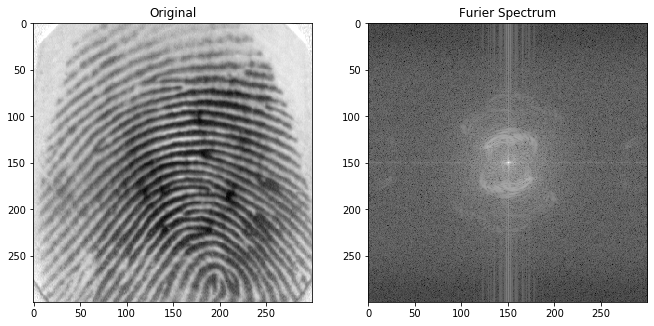

In [3]:
# read image
img = cv2.imread('test images/Fingerprint/101_1.tif', cv2.IMREAD_GRAYSCALE)

# applying FFT
start_time = time.time()
signal_furier = np.fft.fft2(img)
print("Time = %s" % (time.time() - start_time))

# Shift signal
signal_shift = np.fft.fftshift(signal_furier)

# get magnitude
Imag = magnitude(signal_shift)

fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,2,1, title='Original')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2, title='Furier Spectrum')
plt.imshow(np.log(Imag), cmap='gray')

Percent = 0.92
Percent = 0.92
Percent = 0.92
Percent = 0.91
Percent = 0.91
Percent = 0.91
Percent = 0.9
Percent = 0.9
Percent = 0.9
Percent = 0.89
Percent = 0.89
Percent = 0.89
Percent = 0.89
Percent = 0.88
Percent = 0.88
Percent = 0.88
Percent = 0.87
Percent = 0.87
Percent = 0.87
Percent = 0.87
Percent = 0.86
Percent = 0.86
Percent = 0.86
Percent = 0.86
Percent = 0.85
Percent = 0.85
Percent = 0.85
Percent = 0.84
Percent = 0.84
Percent = 0.84
Percent = 0.84
Percent = 0.83
Percent = 0.83
Percent = 0.83
Percent = 0.82
Percent = 0.82
Percent = 0.82
Percent = 0.82
Percent = 0.81
Percent = 0.81
Percent = 0.81
Percent = 0.8
Percent = 0.03
Percent = 0.04
Percent = 0.04
Percent = 0.04
Percent = 0.05
Percent = 0.05
Percent = 0.05
Percent = 0.05
Percent = 0.06
Percent = 0.06
Percent = 0.06
Percent = 0.06
Percent = 0.07
Percent = 0.07
Percent = 0.07
Percent = 0.08
Percent = 0.08
Percent = 0.08
Percent = 0.08
Percent = 0.09
Percent = 0.09
Percent = 0.09
Percent = 0.1
Percent = 0.1
Percent = 0.1
Pe

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


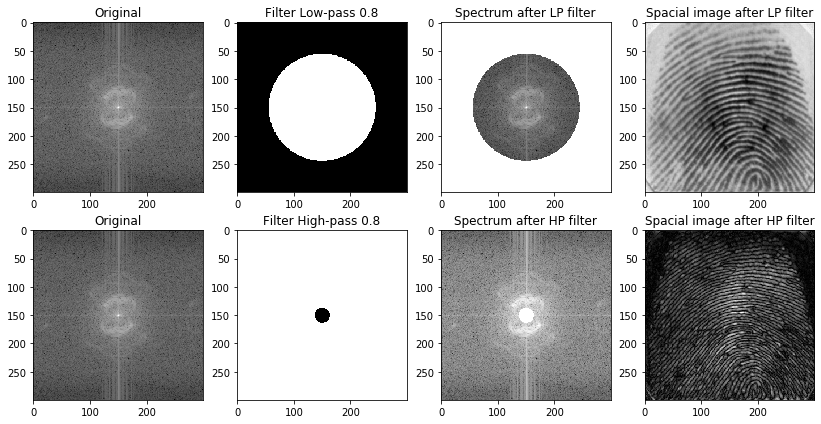

In [4]:
percent = 0.8
# tasks with 80%
taskFilterPercent(Imag, percent, signal_shift)

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


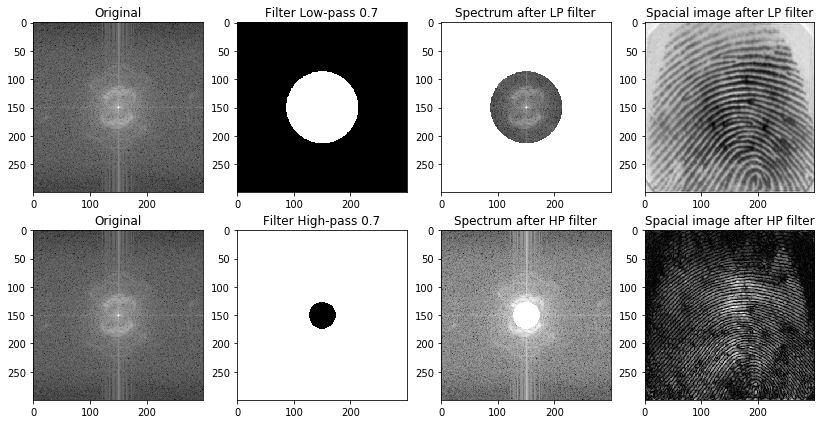

In [25]:
percent = 0.7
# tasks with 70%
taskFilterPercent(Imag, percent, signal_shift)

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


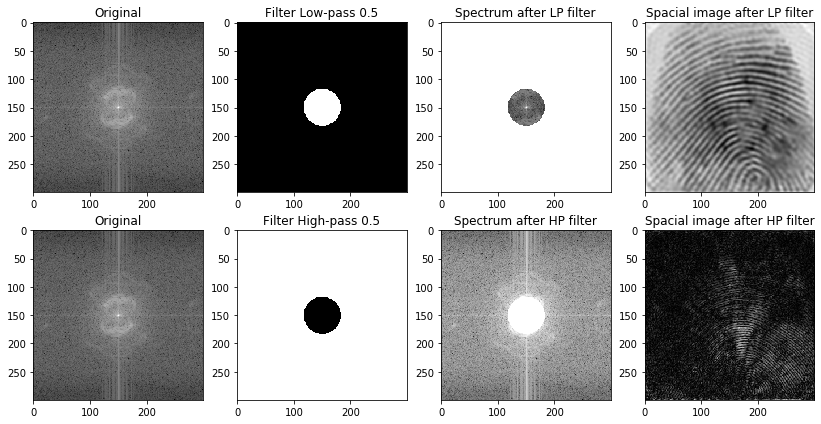

In [26]:
percent = 0.5
# tasks with 50%
taskFilterPercent(Imag, percent, signal_shift)

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


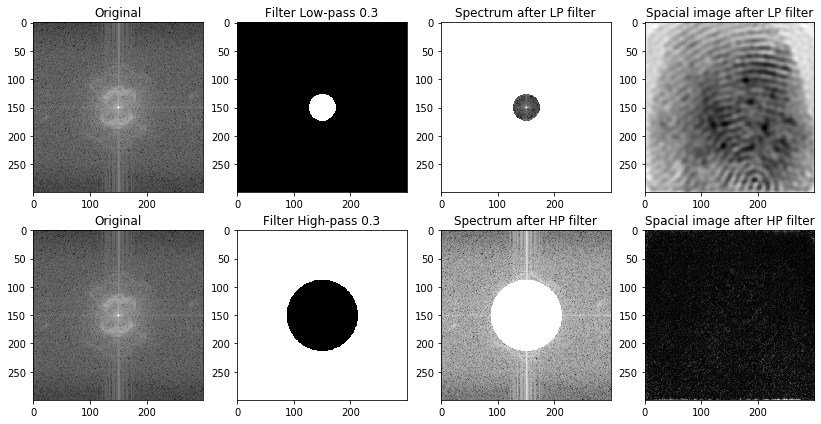

In [27]:
percent = 0.3
# tasks with 30%
taskFilterPercent(Imag, percent, signal_shift)

In [11]:
filter_type = 0 # 0 -> high-pass, 1 -> low-pass
Img_pot = power(Imag)
total = np.sum(Img_pot)
percent = 0.1

total_pass = total*percent
if filter_type == 1:
    radius = np.sqrt((Imag.shape[0]*Imag.shape[1])/np.pi) * percent
else:
    radius = np.sqrt((Imag.shape[0]*Imag.shape[1])* percent/np.pi) # high-pass

flag_incre = False
flag_dec = False
while True:
    if filter_type == 1:
        filter_lp = lpFilter(radius, img)
    else:
        filter_lp = hpFilter(radius, img)
    saida = Img_pot * filter_lp
    total_saida = np.sum(saida)
    percent_out = round(total_saida/total,2)
    
    print("Percent = %s" % percent_out)
    
    if filter_type == 0:
        if percent_out > percent:
            radius+=1
            if not flag_incre :
                flag_incre = True
                
        elif percent_out < percent:
            radius-=1
            if not flag_dec :
                flag_dec = True
            if flag_incre:
                break
        else:
            break
    else:
        if percent_out < percent:
            radius+=1
            if not flag_incre :
                flag_incre = True
            
        elif percent_out > percent:
            radius-=1
            if not flag_dec :
                flag_dec = True
            if flag_incre:
                break
        else:
            break


Percent = 0.34
Percent = 0.34
Percent = 0.33
Percent = 0.33
Percent = 0.32
Percent = 0.32
Percent = 0.31
Percent = 0.31
Percent = 0.3
Percent = 0.3
Percent = 0.3
Percent = 0.29
Percent = 0.29
Percent = 0.28
Percent = 0.28
Percent = 0.28
Percent = 0.27
Percent = 0.27
Percent = 0.26
Percent = 0.26
Percent = 0.26
Percent = 0.25
Percent = 0.25
Percent = 0.25
Percent = 0.24
Percent = 0.24
Percent = 0.24
Percent = 0.23
Percent = 0.23
Percent = 0.23
Percent = 0.23
Percent = 0.22
Percent = 0.22
Percent = 0.22
Percent = 0.21
Percent = 0.21
Percent = 0.21
Percent = 0.21
Percent = 0.2
Percent = 0.2
Percent = 0.2
Percent = 0.2
Percent = 0.19
Percent = 0.19
Percent = 0.19
Percent = 0.18
Percent = 0.18
Percent = 0.18
Percent = 0.18
Percent = 0.17
Percent = 0.17
Percent = 0.17
Percent = 0.16
Percent = 0.16
Percent = 0.16
Percent = 0.16
Percent = 0.15
Percent = 0.15
Percent = 0.15
Percent = 0.14
Percent = 0.14
Percent = 0.14
Percent = 0.14
Percent = 0.13
Percent = 0.13
Percent = 0.13
Percent = 0.12
Pe

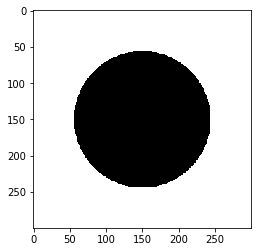

In [43]:
plt.imshow(filter_lp, cmap='gray')

In [78]:
radius

11.847981254502884

In [77]:
radius = np.sqrt((Imag.shape[0]*Imag.shape[1])/np.pi) * percent * 0.1

In [51]:
np.pi

3.141592653589793